In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/My Drive/Group/Feature Space.csv")
df.head()

,Haralick_Mean_Value,Fractal_Dimension,FFT_Mean,FFT_Std,SSM_Mean,SSM_Median,SSM_Std_Dev,Mean_Entropy,Range_Entropy,Median_Entropy,Aspect_Ratio,Label
0,403.427286,2.545389,2430.043865,51019.00172,0.019887,0.010297,0.250425,3.211451,1.949438,3.028394,Variable aspect ratio,Patterned_surface
1,171.471253,2.568873,2064.858462,22716.42011,0.016167,0.000639,0.145739,2.723481,1.837931,2.588493,Variable aspect ratio,Patterned_surface
2,339.014122,2.798025,2784.139115,40702.89564,0.039668,-0.002656,0.221830,3.824544,2.445337,3.990818,Variable aspect ratio,Patterned_surface
3,432.886532,2.826948,3208.682357,38195.00751,0.017798,-0.002418,0.305185,3.614254,1.786809,3.613561,Variable aspect ratio,Patterned_surface
4,481.977900,2.997419,6333.498952,36836.65011,0.016078,0.005391,0.197852,4.181687,1.037032,4.084344,Variable aspect ratio,Patterned_surface


In [ ]:
df.shape

(6120, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Haralick_Mean_Value  6120 non-null   float64
 1   Fractal_Dimension    6120 non-null   float64
 2   FFT_Mean             6120 non-null   float64
 3   FFT_Std              6120 non-null   float64
 4   SSM_Mean             6120 non-null   float64
 5   SSM_Median           6120 non-null   float64
 6   SSM_Std_Dev          6120 non-null   float64
 7   Mean_Entropy         6120 non-null   float64
 8   Range_Entropy        6120 non-null   float64
 9   Median_Entropy       6120 non-null   float64
 10  Aspect_Ratio         6120 non-null   object 
 11  Label                6120 non-null   object 
dtypes: float64(10), object(2)
memory usage: 573.9+ KB


In [ ]:
df.isnull().sum()

Haralick_Mean_Value    0
Fractal_Dimension      0
FFT_Mean               0
FFT_Std                0
SSM_Mean               0
SSM_Median             0
SSM_Std_Dev            0
Mean_Entropy           0
Range_Entropy          0
Median_Entropy         0
Aspect_Ratio           0
Label                  0
dtype: int64

In [ ]:
df['Label'].value_counts()

Label
Patterned_surface              612
Porous_Sponge                  612
Powder                         612
Tips                           612
Particles                      612
Fibres                         612
Films_Coated_Surface           612
Nanowires                      612
MEMS_devices_and_electrodes    612
Biological                     612
Name: count, dtype: int64

In [ ]:
#df.drop((np.where(df['Label'].isin(["Fibres","MEMS_devices_and_electrodes","Particles"]))[0]), inplace = True)

In [ ]:
df['Label'].value_counts()

Label
Patterned_surface              612
Porous_Sponge                  612
Powder                         612
Tips                           612
Particles                      612
Fibres                         612
Films_Coated_Surface           612
Nanowires                      612
MEMS_devices_and_electrodes    612
Biological                     612
Name: count, dtype: int64

In [ ]:
X = df.drop(['Label'], axis=1)
y = df['Label']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = le.fit_transform(X[column])

In [ ]:
X.head()

,Haralick_Mean_Value,Fractal_Dimension,FFT_Mean,FFT_Std,SSM_Mean,SSM_Median,SSM_Std_Dev,Mean_Entropy,Range_Entropy,Median_Entropy,Aspect_Ratio
0,403.427286,2.545389,2430.043865,51019.00172,0.019887,0.010297,0.250425,3.211451,1.949438,3.028394,2
1,171.471253,2.568873,2064.858462,22716.42011,0.016167,0.000639,0.145739,2.723481,1.837931,2.588493,2
2,339.014122,2.798025,2784.139115,40702.89564,0.039668,-0.002656,0.221830,3.824544,2.445337,3.990818,2
3,432.886532,2.826948,3208.682357,38195.00751,0.017798,-0.002418,0.305185,3.614254,1.786809,3.613561,2
4,481.977900,2.997419,6333.498952,36836.65011,0.016078,0.005391,0.197852,4.181687,1.037032,4.084344,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
print("X_train: " + str(X_train.shape))
print("y_train: " + str(y_train.shape))
print("X_test: " + str(X_test.shape))
print("y_test: " + str(y_test.shape))

X_train: (4590, 11)
y_train: (4590,)
X_test: (1530, 11)
y_test: (1530,)


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Accuracy: 0.23202614379084968


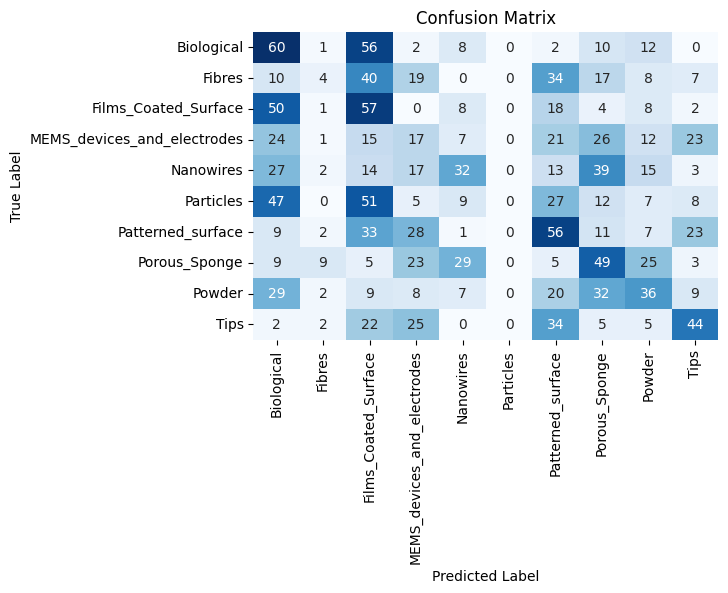

In [ ]:
y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8045751633986928


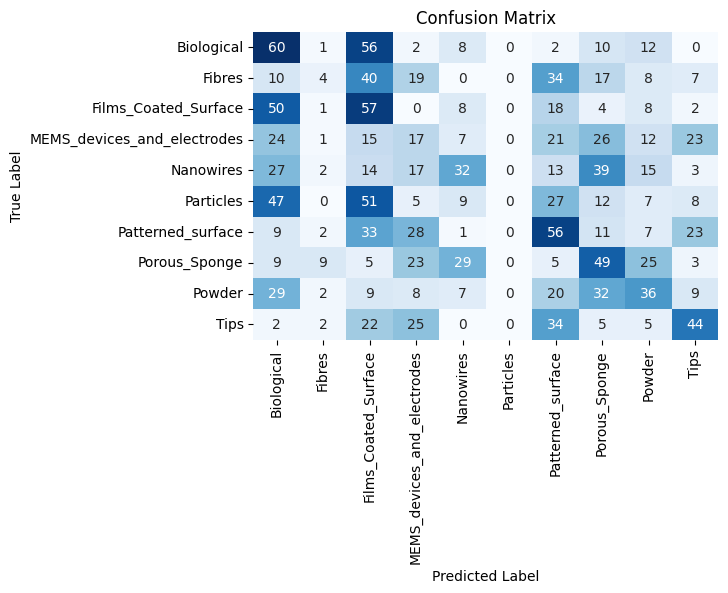

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV


rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8045751633986928


Classification Report:
                             precision    recall  f1-score   support

                 Biological       0.69      0.75      0.72       151
                     Fibres       1.00      1.00      1.00       139
       Films_Coated_Surface       0.79      0.90      0.84       148
MEMS_devices_and_electrodes       0.65      0.67      0.66       146
                  Nanowires       0.96      0.88      0.92       162
                  Particles       0.81      0.68      0.74       166
          Patterned_surface       0.67      0.56      0.61       170
              Porous_Sponge       0.89      0.97      0.93       157
                     Powder       0.72      0.73      0.72       152
                       Tips       0.87      0.96      0.91       139

                   accuracy                           0.80      1530
                  macro avg       0.81      0.81      0.81      1530
               weighted avg       0.80      0.80      0.80      1530



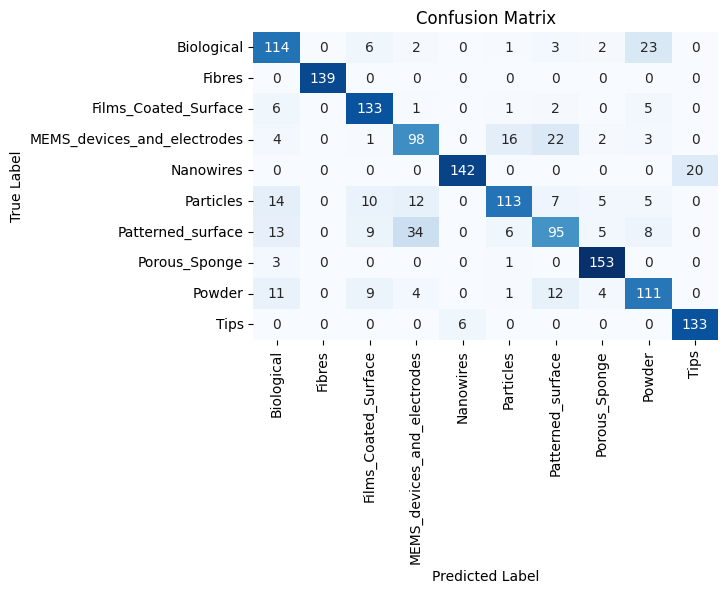

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=best_rf_classifier.classes_, yticklabels=best_rf_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
misclassified_indices = np.where(y_pred != y_test)[0]
misclassified_features = X_test.iloc[misclassified_indices]
true_labels = y_test.iloc[misclassified_indices]
predicted_labels = y_pred[misclassified_indices]

# Display misclassified instances and true labels
for i in range(len(misclassified_indices)):
    print("Instance:", misclassified_indices[i])
    #print("Features:", misclassified_features.iloc[i])
    print("True Label:", true_labels.iloc[i])
    print("Predicted Label:", predicted_labels[i])
    print("--------------------")


Instance: 7
True Label: Nanowires
Predicted Label: Tips
--------------------
Instance: 8
True Label: Powder
Predicted Label: Patterned_surface
--------------------
Instance: 11
True Label: MEMS_devices_and_electrodes
Predicted Label: Particles
--------------------
Instance: 12
True Label: Patterned_surface
Predicted Label: MEMS_devices_and_electrodes
--------------------
Instance: 15
True Label: Patterned_surface
Predicted Label: MEMS_devices_and_electrodes
--------------------
Instance: 16
True Label: Particles
Predicted Label: Biological
--------------------
Instance: 23
True Label: MEMS_devices_and_electrodes
Predicted Label: Particles
--------------------
Instance: 26
True Label: Powder
Predicted Label: Biological
--------------------
Instance: 28
True Label: Patterned_surface
Predicted Label: Biological
--------------------
Instance: 37
True Label: Powder
Predicted Label: Films_Coated_Surface
--------------------
Instance: 39
True Label: Particles
Predicted Label: Porous_Sponge
--

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7222222222222222


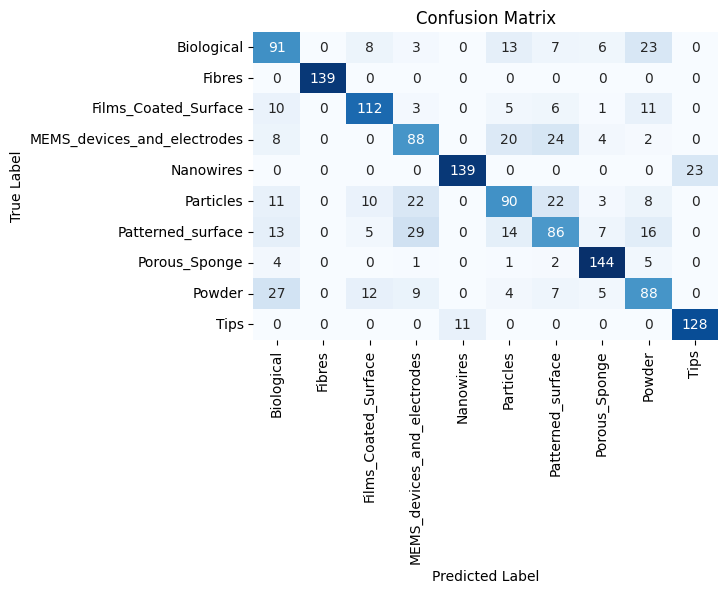

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**XGBOOST**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the string labels to integer labels
y_train_encoded = label_encoder.fit_transform(y_train)

y_test_encoded = label_encoder.fit_transform(y_test)


In [ ]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = xgb_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))

Accuracy: 0.8032679738562092


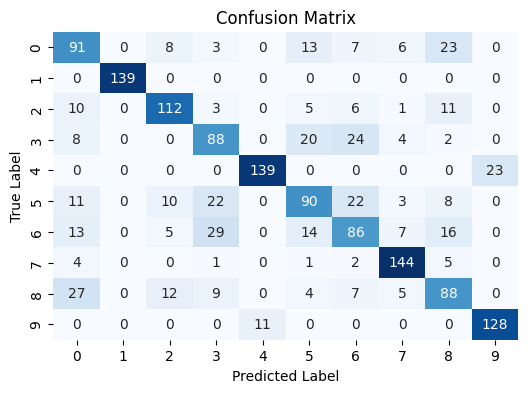

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=xgb_classifier.classes_, yticklabels=xgb_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Cat Boost**

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 5.0 MB/s eta 0:00:00


CatBoost Accuracy: 0.807843137254902


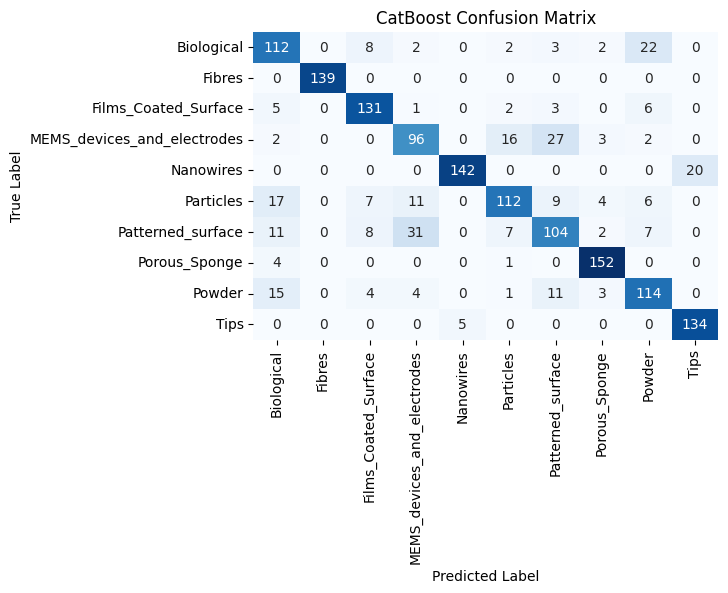

In [ ]:
import catboost as cb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Create a CatBoost classifier
catboost_classifier = cb.CatBoostClassifier(random_seed=42)

# Train the classifier
catboost_classifier.fit(X_train, y_train, verbose=0)  # Set verbose=0 to suppress output

# Make predictions
y_pred_catboost = catboost_classifier.predict(X_test)

# Calculate accuracy
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print("CatBoost Accuracy:", accuracy_catboost)

# Calculate confusion matrix
conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_catboost, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=catboost_classifier.classes_, yticklabels=catboost_classifier.classes_)
plt.title("CatBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_catboost, target_names=catboost_classifier.classes_)
print("CatBoost Classification Report:")
print(report)


CatBoost Classification Report:
                             precision    recall  f1-score   support

                 Biological       0.67      0.74      0.71       151
                     Fibres       1.00      1.00      1.00       139
       Films_Coated_Surface       0.83      0.89      0.86       148
MEMS_devices_and_electrodes       0.66      0.66      0.66       146
                  Nanowires       0.97      0.88      0.92       162
                  Particles       0.79      0.67      0.73       166
          Patterned_surface       0.66      0.61      0.64       170
              Porous_Sponge       0.92      0.97      0.94       157
                     Powder       0.73      0.75      0.74       152
                       Tips       0.87      0.96      0.91       139

                   accuracy                           0.81      1530
                  macro avg       0.81      0.81      0.81      1530
               weighted avg       0.81      0.81      0.81      1530


In [ ]:
import numpy as np

# Reshape y_pred_catboost if necessary
if y_pred_catboost.ndim > 1:
    y_pred_catboost = np.squeeze(y_pred_catboost)

misclassified_indices_catboost = np.where(y_pred_catboost != y_test)[0]
misclassified_features_catboost = X_test.iloc[misclassified_indices_catboost]
true_labels_catboost = y_test.iloc[misclassified_indices_catboost]
predicted_labels_catboost = y_pred_catboost[misclassified_indices_catboost]

misclassified_count_catboost = len(misclassified_indices_catboost)

# Display misclassified instances and true labels
for i in range(misclassified_count_catboost):
    print("Instance:", misclassified_indices_catboost[i])
    # Uncomment the line below if you want to display features
    #print("Features:", misclassified_features_catboost.iloc[i])
    print("True Label:", true_labels_catboost.iloc[i])
    print("Predicted Label:", predicted_labels_catboost[i])
    print("--------------------")

# Print summary report
print("Total Misclassified Instances:", misclassified_count_catboost)


Instance: 7
True Label: Nanowires
Predicted Label: Tips
--------------------
Instance: 8
True Label: Powder
Predicted Label: Patterned_surface
--------------------
Instance: 11
True Label: MEMS_devices_and_electrodes
Predicted Label: Particles
--------------------
Instance: 12
True Label: Patterned_surface
Predicted Label: Films_Coated_Surface
--------------------
Instance: 15
True Label: Patterned_surface
Predicted Label: MEMS_devices_and_electrodes
--------------------
Instance: 16
True Label: Particles
Predicted Label: Biological
--------------------
Instance: 23
True Label: MEMS_devices_and_electrodes
Predicted Label: Particles
--------------------
Instance: 26
True Label: Powder
Predicted Label: Biological
--------------------
Instance: 28
True Label: Patterned_surface
Predicted Label: Biological
--------------------
Instance: 34
True Label: Particles
Predicted Label: Films_Coated_Surface
--------------------
Instance: 37
True Label: Powder
Predicted Label: Films_Coated_Surface
--